# Figures for squidpy.im methods (using fluo datasets)
Contains:
- cell segmentation using watershed
- number of cells per spot + summary features using diifferent channels
- plot of "NEUN" exppression in high/low "anti-NEUN" cells (similarly for GFAP)

In [1]:
import scanpy as sc
import squidpy as sq
import os
import anndata as ad
import tqdm
import itertools as it
import matplotlib.pyplot as plt
import matplotlib as mpl
import pandas as pd
import numpy as np
import imageio

sc.logging.print_header()
print(f"squidpy=={sq.__version__}")

scanpy==1.8.0.dev88+g525f08f6 anndata==0.7.5 umap==0.4.6 numpy==1.19.4 scipy==1.5.3 pandas==1.1.5 scikit-learn==0.23.2 statsmodels==0.12.1 python-igraph==0.8.3 leidenalg==0.8.3
squidpy==1.0.0


In [2]:
# load the pre-processed dataset
img = sq.datasets.visium_fluo_image_crop()
adata = sq.datasets.visium_fluo_adata_crop()

In [3]:
# smooth image to make nicer segmentation masks
sq.im.process(img=img, layer="image",  method='smooth', channel_dim='smooth', sigma=1)
img.compute()

# segment
sq.im.segment(img=img, layer="image_smooth", method="watershed", channel=0, thresh=None)

In [4]:
# define image layer to use for segmentation
features_kwargs = {'segmentation': {'label_layer': 'segmented_watershed'}}
# calculate segmentation features
sq.im.calculate_image_features(adata, img, layer='image', key_added='features', features_kwargs=features_kwargs, 
                               features=['summary', 'segmentation'], spot_scale=1, scale=1.0, mask_circle=True)

  0%|          | 0/704 [00:00<?, ?/s]

/Users/hannah.spitzer/opt/miniconda3/envs/squidpy/lib/python3.8/site-packages/numpy/core/fromnumeric.py:3372: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/Users/hannah.spitzer/opt/miniconda3/envs/squidpy/lib/python3.8/site-packages/numpy/core/_methods.py:170: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/Users/hannah.spitzer/opt/miniconda3/envs/squidpy/lib/python3.8/site-packages/numpy/core/_methods.py:233: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/Users/hannah.spitzer/opt/miniconda3/envs/squidpy/lib/python3.8/site-packages/numpy/core/_methods.py:194: RuntimeWarning: invalid value encountered in true_divide
  arrmean = um.true_divide(
/Users/hannah.spitzer/opt/miniconda3/envs/squidpy/lib/python3.8/site-packages/numpy/core/_methods.py:226: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret

In [5]:
# fill nans
adata.obsm['features'].fillna(value=0, inplace=True)

In [6]:
adata.obsm['features']

,segmentation_label,segmentation_area_mean,segmentation_area_std,segmentation_ch-0_mean_intensity_mean,segmentation_ch-0_mean_intensity_std,segmentation_ch-1_mean_intensity_mean,segmentation_ch-1_mean_intensity_std,segmentation_ch-2_mean_intensity_mean,segmentation_ch-2_mean_intensity_std,summary_ch-0_quantile-0.9,...,summary_ch-1_quantile-0.9,summary_ch-1_quantile-0.5,summary_ch-1_quantile-0.1,summary_ch-1_mean,summary_ch-1_std,summary_ch-2_quantile-0.9,summary_ch-2_quantile-0.5,summary_ch-2_quantile-0.1,summary_ch-2_mean,summary_ch-2_std
AAACGAGACGGTTGAT-1,14,215.142857,316.411093,45476.952030,11075.416863,6490.330189,3963.387961,9064.010907,313.556056,20236.0,...,4916.0,4424.0,0.0,3762.582691,2462.922155,9492.0,8940.0,0.0,7066.140507,3833.091040
AAAGGGATGTAGCAAG-1,16,92.375000,59.208187,53381.207721,8020.174053,4570.947874,126.447748,10428.925830,691.678163,3800.0,...,5380.0,4648.0,0.0,3824.862145,2153.804234,10728.0,8732.0,0.0,7284.791985,4099.007453
AAATGGCATGTCTTGT-1,13,166.846154,152.279018,34028.208751,5358.053737,12117.331639,13203.473509,7734.271043,911.156776,15968.0,...,9400.0,4560.0,0.0,5481.824787,6747.728831,8244.0,7084.0,0.0,5832.763022,3285.301044
AAATGGTCAATGTGCC-1,12,185.833333,170.576881,33625.478496,2022.101563,3596.113391,43.238605,9450.446112,1237.415665,17752.0,...,3532.0,3336.0,0.0,2628.194501,1418.504292,9308.0,7268.0,0.0,6149.998315,3502.327569
AAATTAACGGGTAGCT-1,5,323.800000,197.098351,41736.046305,8897.657417,10591.741810,9811.515470,10356.480116,3157.708352,6468.0,...,4708.0,4172.0,0.0,4036.154302,4447.304626,9384.0,8296.0,0.0,6819.790518,3870.911702
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
TTGTCGTTCAGTTACC-1,24,487.000000,655.574939,52613.808576,11893.709643,3960.449305,363.216681,22105.659474,13872.338947,65532.0,...,4228.0,3436.0,0.0,2873.919041,1599.543965,34740.0,8748.0,0.0,13293.243407,15238.336791
TTGTGGCCCTGACAGT-1,25,155.760000,117.230808,35534.294912,6969.182315,12242.432294,8444.104043,8484.341340,1322.707278,26864.0,...,11940.0,4624.0,0.0,5691.901876,5515.521616,9200.0,7488.0,0.0,6292.253675,3605.135306
TTGTTAGCAAATTCGA-1,27,150.000000,167.233924,34170.385979,6422.252304,17926.804809,11220.478240,7053.559157,266.957056,27752.0,...,21000.0,5476.0,0.0,8171.561437,8886.119191,7404.0,6812.0,0.0,5420.601604,2941.499992
TTGTTCAGTGTGCTAC-1,6,66.166667,57.718907,49310.269031,9740.024244,4541.149166,221.711428,9865.585993,583.910374,2240.0,...,4904.0,4344.0,0.0,3492.945039,1904.360288,10932.0,9032.0,0.0,7458.252114,4166.000170


In [7]:
# quantile normalisation of mean intensity features
q01, q99 = np.quantile(adata.obsm['features'], q=[0.01,0.99], axis=0)
adata.obsm['norm_features'] = np.clip((adata.obsm['features'] - q01) / (q99 - q01), a_min=0, a_max=1)

## Plot and save figures

In [8]:
import skimage.transform
import skimage.color

In [9]:
sc.settings.dpi = 300

In [10]:
#orig_hires = adata.uns['spatial']['V1_Adult_Mouse_Brain_Coronal_Section_2']['images']['hires']
#seg_hires = skimage.transform.resize(img['segmented_watershed'][:,:,0,0]>0, (600,600), order=2)
#adata.uns['spatial']['V1_Adult_Mouse_Brain_Coronal_Section_2']['images']['hires'] = skimage.color.gray2rgb(seg_hires)

In [65]:
inset_y = 3600
inset_x = 1900
inset_sy = 800
inset_sx = 500

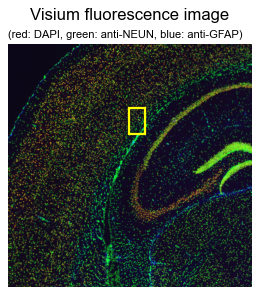

In [79]:
# save image data
fig, ax = plt.subplots(1,1)
ax.imshow(adata.uns['spatial']['V1_Adult_Mouse_Brain_Coronal_Section_2']['images']['hires'])
ax.axis('off')
ax.set_title('Visium fluorescence image\n', fontdict={'fontsize':15})
plt.text(x=0.38, y=0.93, s= "(red: DAPI, green: anti-NEUN, blue: anti-GFAP)", fontsize=10, ha="left", transform=fig.transFigure)

# write rectangle on plot (for extract)
sf = adata.uns['spatial']['V1_Adult_Mouse_Brain_Coronal_Section_2']['scalefactors']['tissue_hires_scalef']
rect = mpl.patches.Rectangle((inset_y*sf,inset_x*sf), width=inset_sx*sf, height=inset_sy*sf, ec='yellow', lw=2, fill=False)
ax.add_patch(rect)

plt.savefig('figures/fluo/fluo_image.png', dpi=300, bbox_inches='tight')

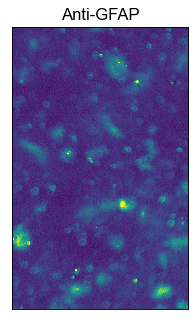

In [75]:
# save segmentation image (inset only)
a = plt.imshow(img['image'][inset_y:inset_y+inset_sy,inset_x:inset_x+inset_sx,0,2]/65536, interpolation='none', vmax=0.25)
plt.grid(False)
plt.gca().set_xticks([])
plt.gca().set_yticks([])
plt.tight_layout()
plt.title('Anti-GFAP', fontdict={'fontsize':15})
plt.savefig('figures/fluo/fluo_image_gfap.png', dpi=300, bbox_inches='tight')

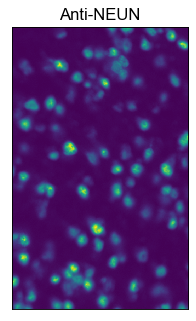

In [74]:
# save segmentation image (inset only)
a = plt.imshow(img['image'][inset_y:inset_y+inset_sy,inset_x:inset_x+inset_sx,0,1]/65536, interpolation='none')
plt.grid(False)
plt.gca().set_xticks([])
plt.gca().set_yticks([])
plt.tight_layout()
plt.title('Anti-NEUN', fontdict={'fontsize':15})
plt.savefig('figures/fluo/fluo_image_neun.png', dpi=300, bbox_inches='tight')

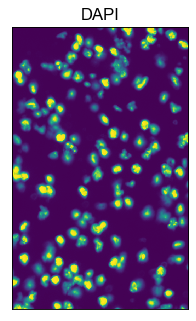

In [77]:
# save segmentation image (inset only)
a = plt.imshow(img['image'][inset_y:inset_y+inset_sy,inset_x:inset_x+inset_sx,0,0]/65536, interpolation='none')
plt.grid(False)
plt.gca().set_xticks([])
plt.gca().set_yticks([])
plt.tight_layout()
plt.title('DAPI', fontdict={'fontsize':15})
plt.savefig('figures/fluo/fluo_image_dapi.png', dpi=300, bbox_inches='tight')

<ipython-input-78-7002d5f6f936>:6: MatplotlibDeprecationWarning: You are modifying the state of a globally registered colormap. In future versions, you will not be able to modify a registered colormap in-place. To remove this warning, you can make a copy of the colormap first. cmap = copy.copy(mpl.cm.get_cmap("plasma"))
  cmap.set_under(color='black')


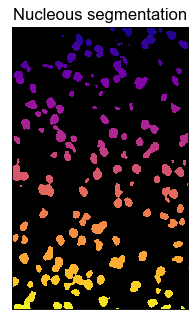

In [78]:
# save segmentation image
# color each segmented object
crop = img['segmented_watershed'][inset_y:inset_y+inset_sy,inset_x:inset_x+inset_sx,0,0].values
crop = skimage.segmentation.relabel_sequential(crop)[0]
cmap = plt.cm.plasma
cmap.set_under(color='black')
a = plt.imshow(crop, interpolation='none', cmap=cmap, vmin=0.001)
plt.grid(False)
plt.gca().set_xticks([])
plt.gca().set_yticks([])
plt.tight_layout()
plt.title('Nucleous segmentation', fontdict={'fontsize':15})
plt.savefig('figures/fluo/fluo_segmentation.png', dpi=300, bbox_inches='tight')

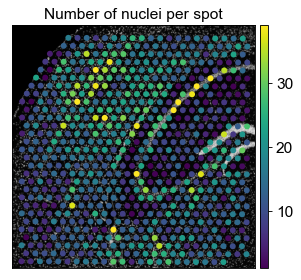

In [35]:
# save ncounts
sc.set_figure_params(facecolor="white", figsize=(8, 4))
fig, ax = plt.subplots(figsize=(8, 4))
sc.pl.spatial(
    sq.pl.extract(adata, 'features'), 
    color=['segmentation_label'], 
    bw=True, 
    title='Number of nuclei per spot',
    crop_coord=(0,7272,0,7272), 
    show=False,
    ax=ax,
    vmax='p99',
    vmin='p01'
)

# write rectangle on plot (for extract)
#sf = adata.uns['spatial']['V1_Adult_Mouse_Brain_Coronal_Section_2']['scalefactors']['tissue_hires_scalef']
#rect = mpl.patches.Rectangle((inset_y*sf,inset_x*sf), width=inset_sx*sf, height=inset_sy*sf, ec='yellow', lw=2, fill=False)
#ax.add_patch(rect)

ax.axes.xaxis.label.set_visible(False)
ax.axes.yaxis.label.set_visible(False)

plt.savefig('figures/fluo/fluo_ncells.png', dpi=300, bbox_inches='tight')

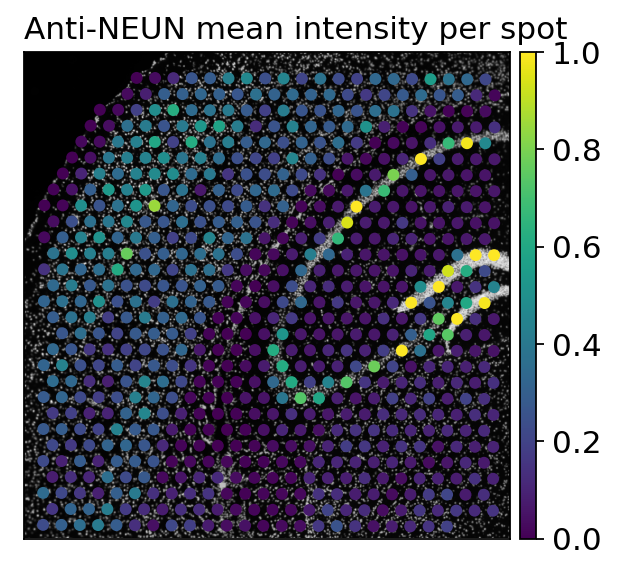

In [60]:
# save mean intensity of anti-neun channel
sc.set_figure_params(facecolor="white", figsize=(8, 4))
fig, ax = plt.subplots(figsize=(8, 4))
sc.pl.spatial(
    sq.pl.extract(adata, 'norm_features'), 
    color=['summary_ch-1_mean'], #['segmentation_ch-1_mean_intensity_mean'], 
    bw=True, 
    title='',
    crop_coord=(0,7272,0,7272), 
    show=False,
    ax=ax,
    vmax=0, #'p99',
    vmin=1, #'p01'
)
ax.set_title('Anti-NEUN mean intensity per spot', loc='left')
ax.axes.xaxis.label.set_visible(False)
ax.axes.yaxis.label.set_visible(False)

plt.savefig('figures/fluo/fluo_anti-neun_intensity.png', dpi=300, bbox_inches='tight')

<ipython-input-59-a64e16d2d73c>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  adata.obs['high_NEUN'][adata.obs['high_NEUN']==True] = 'high anti-NEUN'


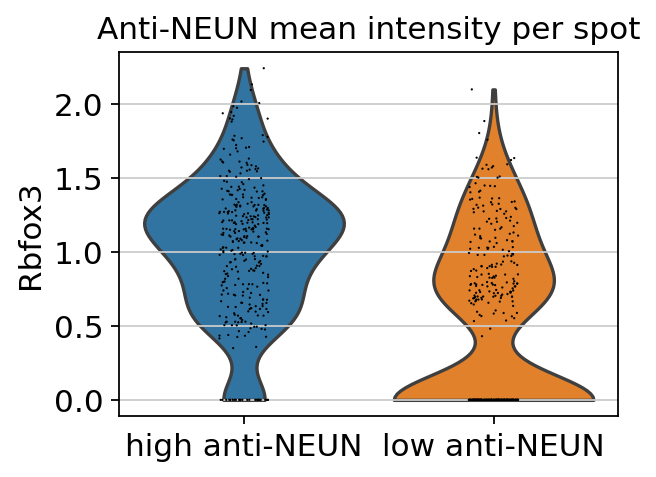

In [59]:
# plot low/high NEUN spots vs rbfox3
adata.obs['high_NEUN'] = adata.obsm['norm_features']['summary_ch-1_mean'] > np.median(adata.obsm['norm_features']['summary_ch-1_mean'])
adata.obs['high_NEUN'][adata.obs['high_NEUN']==True] = 'high anti-NEUN'
adata.obs['high_NEUN'][adata.obs['high_NEUN']==False] = 'low anti-NEUN'
adata.obs['high_NEUN'] = adata.obs['high_NEUN'].astype('category')

# Rbfox3 is the gene that produces the neuronal nuclei (NeuN) antigen that is used as a marker for neurons
# https://www.ncbi.nlm.nih.gov/gene/146713
fig, ax = plt.subplots(1,1, figsize=(4,3))
sc.pl.violin(adata, keys='Rbfox3', groupby='high_NEUN', xlabel=None,
            ax=ax, show=False, use_raw=False, scale='width')
ax.set_title('Anti-NEUN mean intensity per spot')
plt.savefig('figures/fluo/fluo_anti-neun_intensity_violin.png', dpi=300)

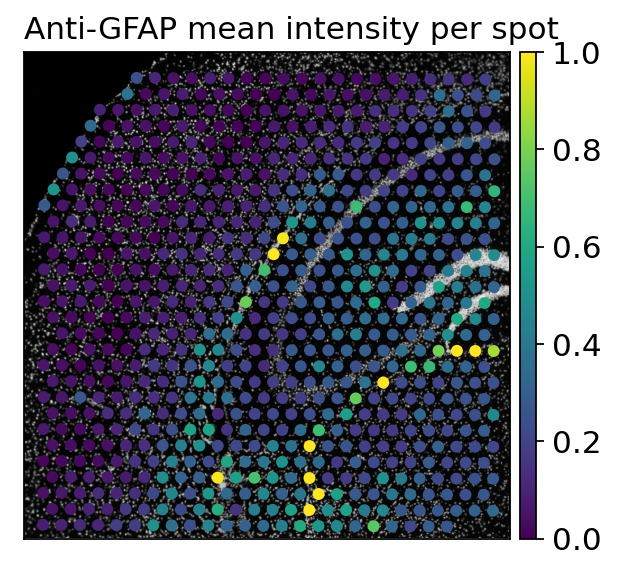

In [58]:
# save mean intensity of anti-gfap channel
sc.set_figure_params(facecolor="white", figsize=(8, 4))
fig, ax = plt.subplots(figsize=(8, 4))
sc.pl.spatial(
    sq.pl.extract(adata, 'norm_features'), 
    color=['summary_ch-2_mean'], #['segmentation_ch-2_mean_intensity_mean'], 
    bw=True, 
    title='',
    crop_coord=(0,7272,0,7272), 
    show=False,
    ax=ax,
    vmax=1, #'p99',
    vmin=0, #'p01'
)
ax.set_title('Anti-GFAP mean intensity per spot', loc='left')
ax.axes.xaxis.label.set_visible(False)
ax.axes.yaxis.label.set_visible(False)

plt.savefig('figures/fluo/fluo_anti-gfap_intensity.png', dpi=300, bbox_inches='tight')

<ipython-input-57-0d3e124556e5>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  adata.obs['high_GFAP'][adata.obs['high_GFAP']==True] = 'high anti-GFAP'


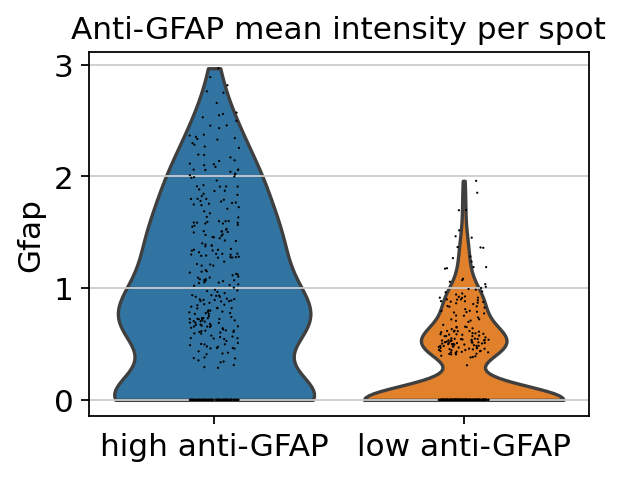

In [57]:
# plot low/high GFAP spots vs gfap
adata.obs['high_GFAP'] = adata.obsm['norm_features']['summary_ch-2_mean'] > np.median(adata.obsm['norm_features']['summary_ch-2_mean'])
adata.obs['high_GFAP'][adata.obs['high_GFAP']==True] = 'high anti-GFAP'
adata.obs['high_GFAP'][adata.obs['high_GFAP']==False] = 'low anti-GFAP'
adata.obs['high_GFAP'] = adata.obs['high_GFAP'].astype('category')

fig, ax = plt.subplots(1,1, figsize=(4,3))
sc.pl.violin(adata, keys='Gfap', groupby='high_GFAP', xlabel=None,
            ax=ax, show=False, use_raw=False, scale='width')
ax.set_title('Anti-GFAP mean intensity per spot')
plt.savefig('figures/fluo/fluo_anti-gfap_intensity_violin.png', dpi=300)

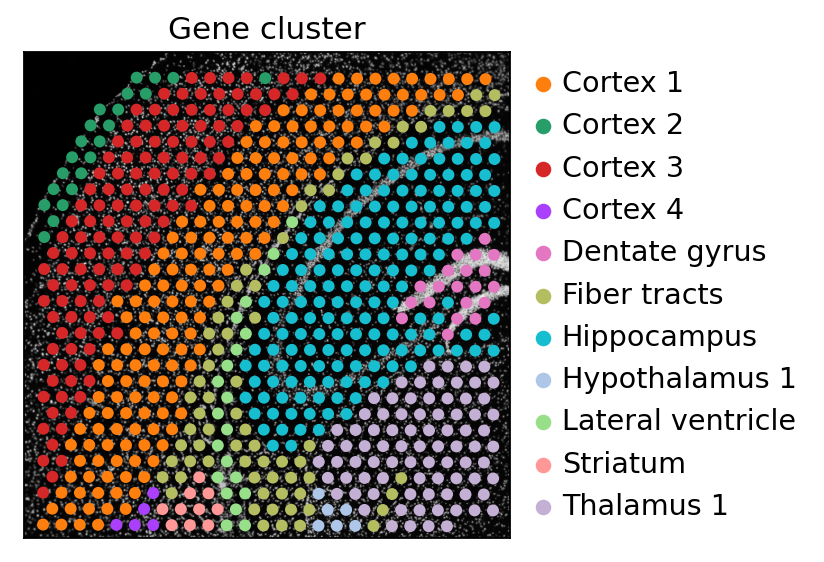

In [20]:
# save clustering
sc.set_figure_params(facecolor="white", figsize=(8, 4))
fig, ax = plt.subplots(figsize=(8, 4))
sc.pl.spatial(
    adata, 
    color=['cluster'], 
    bw=True, 
    title='Gene cluster',
    crop_coord=(0,7272,0,7272), 
    show=False,
    ax=ax,
    vmax='p99',
    vmin='p01'
)

ax.axes.xaxis.label.set_visible(False)
ax.axes.yaxis.label.set_visible(False)

# change legend labels
legend = ax.get_legend()
labels = legend.get_texts()
for i,l in enumerate(labels):
    legend.get_texts()[i].set_text(' '.join(l.get_text().split('_')))

plt.savefig('figures/fluo/fluo_clusters.png', dpi=300, bbox_inches='tight')

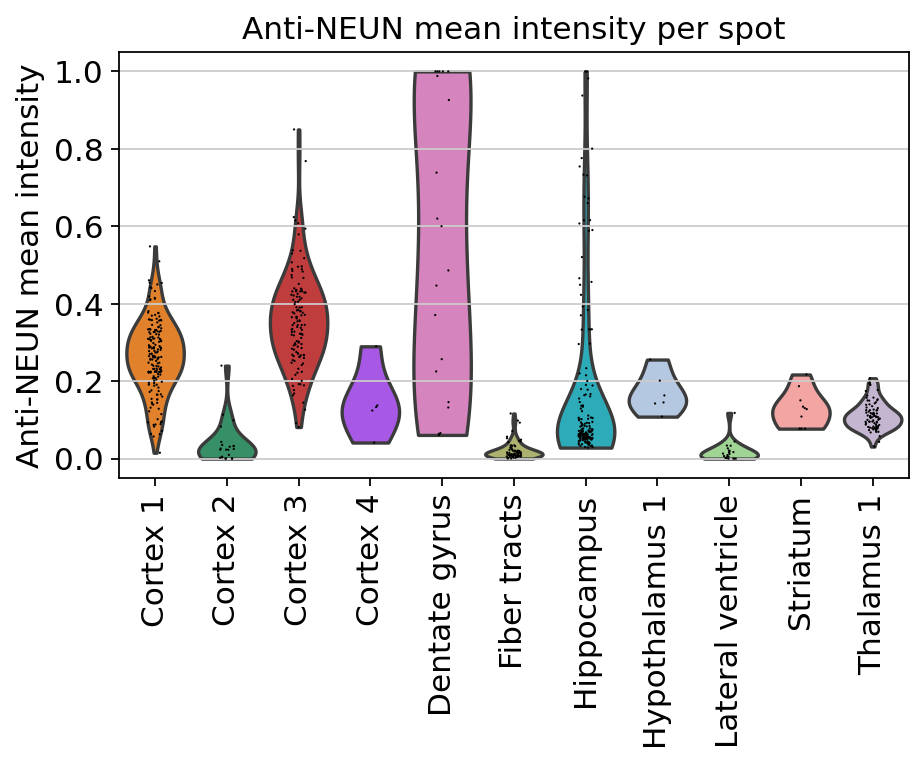

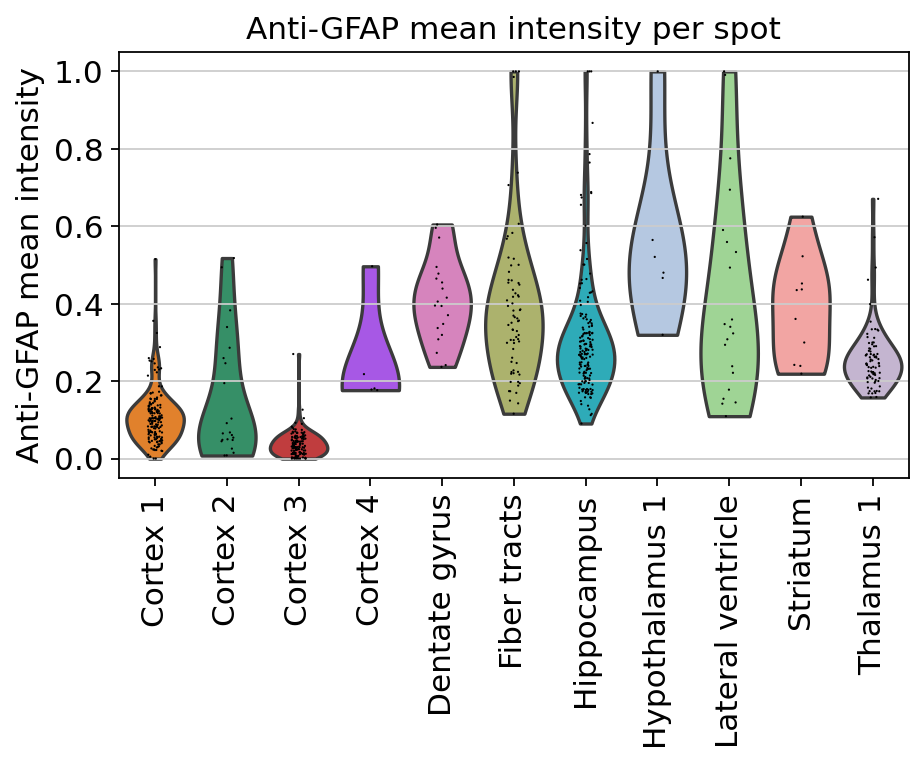

In [56]:
# plot violin plot of anti NEUN + antiGFP for clustering
fig, ax = plt.subplots(1,1, figsize=(6,5))
sc.pl.violin(sq.pl.extract(adata, 'norm_features'), keys='summary_ch-1_mean', groupby='cluster', xlabel=None,
             ylabel='Anti-NEUN mean intensity',
            ax=ax, show=False, use_raw=False, scale='width', rotation=90)
ax.set_title('Anti-NEUN mean intensity per spot')
# change legend labels
labels = ax.axes.xaxis.get_ticklabels()
for i,l in enumerate(labels):
    l.set_text(' '.join(l.get_text().split('_')))
ax.axes.xaxis.set_ticklabels(labels)

plt.tight_layout()
plt.savefig('figures/fluo/fluo_anti-neun_intensity_per_cluster.png', dpi=300)

# -----------

fig, ax = plt.subplots(1,1, figsize=(6,5))
sc.pl.violin(sq.pl.extract(adata, 'norm_features'), keys='summary_ch-2_mean', groupby='cluster', xlabel=None,
             ylabel='Anti-GFAP mean intensity',
            ax=ax, show=False, use_raw=False, scale='width', rotation=90)
ax.set_title('Anti-GFAP mean intensity per spot')
# change legend labels
labels = ax.axes.xaxis.get_ticklabels()
for i,l in enumerate(labels):
    l.set_text(' '.join(l.get_text().split('_')))
ax.axes.xaxis.set_ticklabels(labels)

plt.tight_layout()
plt.savefig('figures/fluo/fluo_anti-gfap_intensity_per_cluster.png', dpi=300)